# Peer-graded Assignment:
# _Segmenting and Clustering Neighbourhoods in Toronto_

_By Oludayo_

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

This assignment is in 3 parts as indicated below:

<a href='#part1'>1. Web Scrapping and Data Cleansing</a>
<br>
<a href='#part2'>2. Geocoding</a>
<br>
<a href='#part3'>3. Exploration and Clustering</a>
<br>
<a href='#conclude'>4. Conclusion</a>

</div>

Every part when updated is committed to `github` with respective link for assessment.

<a id='part1'></a>

## Part 1 - Web Scrapping and Data Cleansing

### 1.1 Notebook Created

A notebook was created accordingly

### 1.2 Web scrapping

To start the web scrapping of the Wikipedia page for the __[Toronto Neighbourhood](https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M)__, the following steps were taken and necessary libraries imported:

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from ipywidgets import *
from IPython.display import display

The `url` of the wikipedia page of the Toronto neighbourhood is then assigned as shown below:

In [2]:
wikipedia_link = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

Sometime, it is important to specify the `User-Agent` to be able to be certain the requested page is actually downloaded. The following steps demonstrate this:

In [3]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0'}

In [4]:
wikipedia_page = requests.get(wikipedia_link, headers = headers)

To test whether the wikipedia page was rightly downloaded with the needed content, perform either of the following Options 1 or 2. If code `"200"` is obtained, then page downloaded rightly, otherwise, if code `"403"`, it is bad link - page forbidden.

In [5]:
# Option 1
wikipedia_page

<Response [200]>

In [6]:
# Option 2
wikipedia_page.status_code

200

Now, to clean our html page (source), the `BeautifulSoup` method is applied as shown below:

In [7]:
# Cleans html file
soup = BeautifulSoup(wikipedia_page.content, 'html.parser')
# soup

Or to see a more organised `html`, use `prettify` _(this might not be necessary though)_.

In [8]:
# print(soup.prettify())

In [9]:
# This extracts the "tbody" within the table where class is "wikitable sortable"
table = soup.find('table', {'class':'wikitable sortable'}).tbody
table

<tbody><tr>
<th>Postcode</th>
<th>Borough</th>
<th>Neighbourhood
</th></tr>
<tr>
<td>M1A</td>
<td>Not assigned</td>
<td>Not assigned
</td></tr>
<tr>
<td>M2A</td>
<td>Not assigned</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3A</td>
<td><a href="/wiki/North_York" title="North York">North York</a></td>
<td><a href="/wiki/Parkwoods" title="Parkwoods">Parkwoods</a>
</td></tr>
<tr>
<td>M4A</td>
<td><a href="/wiki/North_York" title="North York">North York</a></td>
<td><a href="/wiki/Victoria_Village" title="Victoria Village">Victoria Village</a>
</td></tr>
<tr>
<td>M5A</td>
<td><a href="/wiki/Downtown_Toronto" title="Downtown Toronto">Downtown Toronto</a></td>
<td><a href="/wiki/Harbourfront_(Toronto)" title="Harbourfront (Toronto)">Harbourfront</a>
</td></tr>
<tr>
<td>M5A</td>
<td><a href="/wiki/Downtown_Toronto" title="Downtown Toronto">Downtown Toronto</a></td>
<td><a href="/wiki/Regent_Park" title="Regent Park">Regent Park</a>
</td></tr>
<tr>
<td>M6A</td>
<td><a href="/wiki/North_York" tit

In [10]:
# Extracts all "tr" (table rows) within the table above
rows = table.find_all('tr')
rows

[<tr>
 <th>Postcode</th>
 <th>Borough</th>
 <th>Neighbourhood
 </th></tr>, <tr>
 <td>M1A</td>
 <td>Not assigned</td>
 <td>Not assigned
 </td></tr>, <tr>
 <td>M2A</td>
 <td>Not assigned</td>
 <td>Not assigned
 </td></tr>, <tr>
 <td>M3A</td>
 <td><a href="/wiki/North_York" title="North York">North York</a></td>
 <td><a href="/wiki/Parkwoods" title="Parkwoods">Parkwoods</a>
 </td></tr>, <tr>
 <td>M4A</td>
 <td><a href="/wiki/North_York" title="North York">North York</a></td>
 <td><a href="/wiki/Victoria_Village" title="Victoria Village">Victoria Village</a>
 </td></tr>, <tr>
 <td>M5A</td>
 <td><a href="/wiki/Downtown_Toronto" title="Downtown Toronto">Downtown Toronto</a></td>
 <td><a href="/wiki/Harbourfront_(Toronto)" title="Harbourfront (Toronto)">Harbourfront</a>
 </td></tr>, <tr>
 <td>M5A</td>
 <td><a href="/wiki/Downtown_Toronto" title="Downtown Toronto">Downtown Toronto</a></td>
 <td><a href="/wiki/Regent_Park" title="Regent Park">Regent Park</a>
 </td></tr>, <tr>
 <td>M6A</td>
 <td

In [11]:
# Extracts the column headers, removes and replaces possible '\n' with space for the "th" tag
columns = [i.text.replace('\n', '')
           for i in rows[0].find_all('th')]
columns

['Postcode', 'Borough', 'Neighbourhood']

### 1.3 Creating the Dataframe

In [12]:
# Converts columns to pd dataframe
df = pd.DataFrame(columns = columns)
df

,Postcode,Borough,Neighbourhood


In [13]:
# Extracts every row with corresponding columns
# Then appends the values to the create pd dataframe "df"
# Please not that the first row (row[0]) is skipped because it is already the header

for i in range(1, len(rows)):
    tds = rows[i].find_all('td')
    
    
    if len(tds) == 4:
        values = [tds[0].text, tds[1].text, tds[2].text, tds[3].text.replace('\n', ''.replace('\xa0',''))]
    else:
        values = [td.text.replace('\n', '').replace('\xa0','') for td in tds]
        
        df = df.append(pd.Series(values, index = columns), ignore_index = True)

        df

In [14]:
# Original shape of dataframe
df.shape

(289, 3)

In [15]:
df.head(10)

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
9,M8A,Not assigned,Not assigned


In [16]:
(df['Borough'] == 'Not assigned').sum()

77

In [17]:
dff = df # reassignment to preserve the original content of "df" before manipulations

### 1.4 Dataframe manipulation

There are `77`"Not assigned" values under the **`Borough`**. Since only cells with an assigned Borough will be processed, therefore, any cell where the `Borough` is `Not assigned` are dropped as shown below:

In [18]:
# df_na is the output of the dataframe after dropping the Borough "Not assigned" rows
df_na = dff[dff.Borough != 'Not assigned']
df_na.head()

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights


In [19]:
# Shape of dataframe after dropping the Borough "Not assigned" rows
df_na.shape

(212, 3)

To know how many Neighbourhoods has **`Not assigned`** but with Borough name, the following was done:

In [20]:
(df_na['Neighbourhood'] == 'Not assigned').sum()

1

So it is only `1` `Not assigned` neighbourhood that will be replaced by it Borough name.

In [21]:
# Using numpy was faster for this replacement
import numpy as np
df_na['Neighbourhood'] = np.where(df_na['Neighbourhood'] == 'Not assigned', df_na['Borough'], df_na['Neighbourhood'])

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [22]:
df_na.shape

(212, 3)

In [23]:
df_na.head(5)

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights


The shape of the dataframe `df_na` is still the same - `(212, 3)`.

In [24]:
type(df_na)

pandas.core.frame.DataFrame

Now, to get where more than one neighborhood exist in one postal code area and combining the respective rows for the neighbourhood into the Postcode and corresponding Borough, the following was done and subsequently checked to for the given instance of **`M5A`** listed twice and with two neighborhoods - **Harbourfront** and **Regent Park**. These rows are combined and separated with a comma as shown.

In [25]:
# df_ca is the output of this combinations of neighbourhood
df_ca = df_na.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(', '.join).reset_index()
df_ca.columns = ['Postcode', 'Borough', 'Neighbourhood']
df_ca.head(10)

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [26]:
# df_ca is assigned to df_toronto
df_toronto = df_ca

In [27]:
type(df_toronto)

pandas.core.frame.DataFrame

In [28]:
# df_toronto is the final dataframe
df_toronto.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [29]:
df_toronto.to_csv('TorontoPostcodes.csv', index = False)

The merging of neighbourhoods with same postcodes was verified for `M5A` as follows:

In [30]:
df_toronto.loc[df_toronto['Postcode'] == 'M5A']

,Postcode,Borough,Neighbourhood
53,M5A,Downtown Toronto,"Harbourfront, Regent Park"


In [31]:
# Final Data frame shape
df_toronto.shape

(103, 3)

<a id='part2'></a>

## Part 2 - Geocoding

In [32]:
!pip -q install geocoder
#!conda install -c conda-forge geocoder --yes 

In [33]:
# Imports Geocoder libraries - google, arcgis et cetera
import geocoder

In [34]:
df_toronto.tail(5)

,Postcode,Borough,Neighbourhood
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv..."
101,M9V,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ..."
102,M9W,Etobicoke,Northwest


**Special Note:**: After running the `Google` geocoder - `g = geocoder.arcgis` for several hours, it was put aside for the `arcgis`. The **ARCGIS** is from **ESRI ARCGIS**. And it was fast enough. _Please check the __[`Geocoder`](https://media.readthedocs.org/pdf/geocoder/latest/geocoder.pdf)__ for more._

In [35]:
import time
start = time.time()

'''Geocoder starts here'''
'''Defining a function to use --> get_latlng()'''
def get_latlng(arcgis_geocoder):
    
    # Initialize the Location (lat. and long.) to "None"
    lat_lng_coords = None
    
    # While loop helps to create a continous run until all the location coordinates are geocoded
    
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Toronto, Ontario'.format(arcgis_geocoder))
        lat_lng_coords = g.latlng
    return lat_lng_coords
'''Geocoder ends here'''

end = time.time()
print("Time of execution: ", end - start)

Time of execution:  0.0001499652862548828


To check the accuracy the geocoding, a sample postcode was used and then reversed-geocoded using a Geocoder provider that provides `REVERSE GEOCODING`, `geocodefarm` was used, which is part of **GeocodeFarm** (please see Geocoder documentation above).

In [36]:
sample = get_latlng('M4G')
sample

[43.70976500000006, -79.36379132299999]

In [37]:
gg = geocoder.geocodefarm(sample,method = 'reverse')
gg

<[OK] Geocodefarm - Reverse [253 McRae Dr, Toronto, ON M4G 1T7, Canada, Canada]>

In [38]:
import time
start = time.time()

postal_codes = df_toronto['Postcode']    
coordinates = [get_latlng(postal_code) for postal_code in postal_codes.tolist()]

end = time.time()
print("Time of execution: ", end - start, "seconds")

Time of execution:  57.27085328102112 seconds


In [39]:
# This will store the Toronto dataframe with coordinates
df_toronto_loc = df_toronto

# The obtained coordinates (latitude and longitude) are joined with the dataframe as shown
df_toronto_coordinates = pd.DataFrame(coordinates, columns = ['Latitude', 'Longitude'])
df_toronto_loc['Latitude'] = df_toronto_coordinates['Latitude']
df_toronto_loc['Longitude'] = df_toronto_coordinates['Longitude']

In [40]:
df_toronto_loc.to_csv('TorontoPostcodes.csv', index = False)

df_toronto_loc.head(5)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.811650,-79.195561
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.785605,-79.158701
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.765690,-79.175299
3,M1G,Scarborough,Woburn,43.768216,-79.217610
4,M1H,Scarborough,Cedarbrae,43.769608,-79.239440


In [41]:
import folium
import pandas as pd

# Toronto_coordinates - 43.6532° N, 79.3832° W
toronto_loc = (43.6532, -79.3832)
# create empty map zoomed in on Toronto
map = folium.Map(location = toronto_loc, zoom_start = 12)

display(map)

<a id='part3'></a>

## Part 3 - Exploration and Clustering

For this section, the neighbourhoods in Toronto will be explore and clustered; but as advised in the assignment instruction, emphasis will be placed only on the Boroughs with Toronto

### 3.1 Libraries

To get started, the call libraries section (shown below) was used similar to the New York analysis.

In [42]:
# library to handle data in a vectorized manner
import numpy as np

# library for data analsysis
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle JSON files
import json
print('numpy, pandas, ..., imported...')

!pip -q install geopy
# conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
print('geopy installed...')
# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim
print('Nominatim imported...')

# library to handle requests
import requests
print('requests imported...')

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize
print('json_normalize imported...')

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
print('matplotlib imported...')

# import k-means from clustering stage
from sklearn.cluster import KMeans
print('Kmeans imported...')

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip -q install folium
print('folium installed...')
import folium # map rendering library
print('folium imported...')

numpy, pandas, ..., imported...
geopy installed...
Nominatim imported...
requests imported...
json_normalize imported...
matplotlib imported...
Kmeans imported...
folium installed...
folium imported...


### 3.2 Data wrangling and location extractions

Now, let's recall the dataframe from Part 2 - `df_toronto_loc`, which is the updated dataframe with the Location data for the Boroughs.

Since the emphasis will be on Boroughs with Toronto, the rows with the Borough with `Toronto`string will be extracted as shown below for this section.

By using the `str.contains`method to search which Borough has `Toronto`, returning `TRUE`or `FALSE`; then result gets assignment to the new set as shown below:

In [43]:
# df_toronto_loc.Borough.str.contains('Toronto') -> TRUE or FALSE output
new_df_toronto_loc = df_toronto_loc[df_toronto_loc.Borough.str.contains('Toronto')]
new_df_toronto_loc.head(10)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676531,-79.295410
41,M4K,East Toronto,"The Danforth West, Riverdale",43.683262,-79.355120
42,M4L,East Toronto,"The Beaches West, India Bazaar",43.667985,-79.314642
43,M4M,East Toronto,Studio District,43.662766,-79.334830
44,M4N,Central Toronto,Lawrence Park,43.728135,-79.387090
45,M4P,Central Toronto,Davisville North,43.712755,-79.388514
46,M4R,Central Toronto,North Toronto West,43.714523,-79.406960
47,M4S,Central Toronto,Davisville,43.702765,-79.385769
48,M4T,Central Toronto,"Moore Park, Summerhill East",43.690505,-79.382973
49,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686003,-79.402335


In [44]:
len(new_df_toronto_loc.Borough.value_counts())

4

In [45]:
len(new_df_toronto_loc.Postcode.value_counts())

38

In [46]:
new_df_toronto_loc.shape

(38, 5)

In [47]:
len(new_df_toronto_loc)

38

As a result of the above, there are 4 Boroughs and 38 Postcodes where the Borough's name is with `Toronto`. Therefore, this will be the working set for the exploration and clustering.

Also, from Part 2, above, the `df_toronto_coordinates` will be used in the Map.

In [48]:
df_toronto_coordinates.head(3)

,Latitude,Longitude
0,43.811650,-79.195561
1,43.785605,-79.158701
2,43.765690,-79.175299


In [49]:
df_toronto_coordinates['Latitude'].head(3)

0    43.811650
1    43.785605
2    43.765690
Name: Latitude, dtype: float64

In [50]:
df_toronto_coordinates['Longitude'].head(3)

0   -79.195561
1   -79.158701
2   -79.175299
Name: Longitude, dtype: float64

In [51]:
new_df_toronto_loc['Latitude'].head(3)

37    43.676531
41    43.683262
42    43.667985
Name: Latitude, dtype: float64

In [52]:
new_df_toronto_loc

,Postcode,Borough,Neighbourhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676531,-79.295410
41,M4K,East Toronto,"The Danforth West, Riverdale",43.683262,-79.355120
42,M4L,East Toronto,"The Beaches West, India Bazaar",43.667985,-79.314642
43,M4M,East Toronto,Studio District,43.662766,-79.334830
44,M4N,Central Toronto,Lawrence Park,43.728135,-79.387090
45,M4P,Central Toronto,Davisville North,43.712755,-79.388514
46,M4R,Central Toronto,North Toronto West,43.714523,-79.406960
47,M4S,Central Toronto,Davisville,43.702765,-79.385769
48,M4T,Central Toronto,"Moore Park, Summerhill East",43.690505,-79.382973
49,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686003,-79.402335


### 3.3 Data visualization

Using the `geopy` library, the latitude and longitude values of Toronto is obtained.

In [53]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


Then the Toronto map is created using the `folium`library.

In [60]:
# df_toronto_coordinates
map_toronto = folium.Map(location = [latitude, longitude], zoom_start = 12)
map_toronto

After creating the map of Toronto, the neighbourhoods are then superimposed on top as shown below, still uing the `folium`library:

In [63]:
# Adding markers to map
for lat, lng, borough, neighbourhood in zip(new_df_toronto_loc['Latitude'], 
                                            new_df_toronto_loc['Longitude'],
                                            new_df_toronto_loc['Borough'],
                                            new_df_toronto_loc['Neighbourhood']):
    label = '{} - {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_toronto)  
    
display(map_toronto)

### 3.5 Define Foursquare Credentials and Version

The next step is to explore further the Neighbourhoods by using the **Foursquare API**; and also do segmentation. This is started by defining **Foursquare Credentials and Version** as shown below:

In [64]:
CLIENT_ID = 'ZAWBNTCLOZ5Y0WUFIPB22TR3KTQTC0QZ0LLUTVGKABAI1FYG' # your Foursquare ID
CLIENT_SECRET = 'GJGR5VU45VNMGYN30RLOMG0XGFW0PVYT2D2BJ1BU5QCYZSIZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZAWBNTCLOZ5Y0WUFIPB22TR3KTQTC0QZ0LLUTVGKABAI1FYG
CLIENT_SECRET:GJGR5VU45VNMGYN30RLOMG0XGFW0PVYT2D2BJ1BU5QCYZSIZ


In [65]:
type(new_df_toronto_loc)

pandas.core.frame.DataFrame

### 3.6 Initial Exploration of a Single Neighbourhood - Central Toronto

Since there might be many location venues around this neighbourhood, for a start, we explore the **Central Toronto**.

In [66]:
new_df_toronto_loc.head(10)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676531,-79.295410
41,M4K,East Toronto,"The Danforth West, Riverdale",43.683262,-79.355120
42,M4L,East Toronto,"The Beaches West, India Bazaar",43.667985,-79.314642
43,M4M,East Toronto,Studio District,43.662766,-79.334830
44,M4N,Central Toronto,Lawrence Park,43.728135,-79.387090
45,M4P,Central Toronto,Davisville North,43.712755,-79.388514
46,M4R,Central Toronto,North Toronto West,43.714523,-79.406960
47,M4S,Central Toronto,Davisville,43.702765,-79.385769
48,M4T,Central Toronto,"Moore Park, Summerhill East",43.690505,-79.382973
49,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686003,-79.402335


In [67]:
# Resets the current index to a new
toronto_df = new_df_toronto_loc.reset_index().drop('index', axis = 1)

In [68]:
toronto_df.to_csv('PlusTorontoBoroughs.csv', index = False)

In [69]:
toronto_df.shape

(38, 5)

In [70]:
toronto_df

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676531,-79.295410
1,M4K,East Toronto,"The Danforth West, Riverdale",43.683262,-79.355120
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.667985,-79.314642
3,M4M,East Toronto,Studio District,43.662766,-79.334830
4,M4N,Central Toronto,Lawrence Park,43.728135,-79.387090
5,M4P,Central Toronto,Davisville North,43.712755,-79.388514
6,M4R,Central Toronto,North Toronto West,43.714523,-79.406960
7,M4S,Central Toronto,Davisville,43.702765,-79.385769
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.690505,-79.382973
9,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686003,-79.402335


Now, let's use the "Central Toronto" which has index from **4**.

In [71]:
toronto_df.loc[4, 'Borough']

'Central Toronto'

And the corresponding Neighbourhoods are:

In [72]:
toronto_df.loc[4, 'Neighbourhood']

'Lawrence Park'

In [73]:
central_toronto4_lat = toronto_df.loc[4, 'Latitude']
central_toronto4_long = toronto_df.loc[4, 'Longitude']
central_toronto4_borough = toronto_df.loc[4, 'Borough']
central_toronto4_postcode = toronto_df.loc[4, 'Postcode']

print('The latitude and longitude values of the {} borough with postcode {}, are {}, {}.'.format(central_toronto4_borough,
                                                                                                 central_toronto4_postcode,
                                                                                                 central_toronto4_lat,
                                                                                                 central_toronto4_long))

The latitude and longitude values of the Central Toronto borough with postcode M4N, are 43.728135000000066, -79.38709009599995.


Let's explore the top 100 venues that are within a 500 metres radius of Central Toronto Borough (postcode: M4N) - **Lawrence Park**.

Next, let's create the `GET` request `URL`, and then the `url` is named.

In [74]:
'''
Credentials are provided already for this part
'''
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    central_toronto4_lat, 
    central_toronto4_long, 
    radius, 
    LIMIT)

# displays URL
url

'https://api.foursquare.com/v2/venues/explore?&client_id=ZAWBNTCLOZ5Y0WUFIPB22TR3KTQTC0QZ0LLUTVGKABAI1FYG&client_secret=GJGR5VU45VNMGYN30RLOMG0XGFW0PVYT2D2BJ1BU5QCYZSIZ&v=20180605&ll=43.728135000000066,-79.38709009599995&radius=500&limit=100'

The, send the `GET` request and examine the resutls

In [75]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c4b3b3cf594df2113275fee'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-5082ef77e4b0a7491cf7b022-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/pool_',
          'suffix': '.png'},
         'id': '52e81612bcbc57f1066b7a44',
         'name': 'Swim School',
         'pluralName': 'Swim Schools',
         'primary': True,
         'shortName': 'Swim School'}],
       'id': '5082ef77e4b0a7491cf7b022',
       'location': {'cc': 'CA',
        'country': 'Canada',
        'distance': 343,
        'formattedAddress': ['Canada'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.72853205765438,
          'lng': -79.3828602612317}],
        'lat': 43.72853205765438,
        'lng': -79.3828602612317},
      

The following was the output of the Neighbourhood - `Roselawn`.

In [76]:
# Result of Roselawn venues
'''
{'meta': {'code': 200, 'requestId': '5c4b1c374c1f6744ece71e4e'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Lawrence Park South',
  'headerFullLocation': 'Lawrence Park South, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 0,
  'suggestedBounds': {'ne': {'lat': 43.71644115850005,
    'lng': -79.41290602839682},
   'sw': {'lat': 43.70744114950004, 'lng': -79.42533397160311}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': []}]}}
'''

'\n{\'meta\': {\'code\': 200, \'requestId\': \'5c4b1c374c1f6744ece71e4e\'},\n \'response\': {\'warning\': {\'text\': "There aren\'t a lot of results near you. Try something more general, reset your filters, or expand the search area."},\n  \'headerLocation\': \'Lawrence Park South\',\n  \'headerFullLocation\': \'Lawrence Park South, Toronto\',\n  \'headerLocationGranularity\': \'neighborhood\',\n  \'totalResults\': 0,\n  \'suggestedBounds\': {\'ne\': {\'lat\': 43.71644115850005,\n    \'lng\': -79.41290602839682},\n   \'sw\': {\'lat\': 43.70744114950004, \'lng\': -79.42533397160311}},\n  \'groups\': [{\'type\': \'Recommended Places\',\n    \'name\': \'recommended\',\n    \'items\': []}]}}\n'

From the `results`, the necessary information needs to be obtained from **items** key. To do this, the **`get_category_type`** function is used from the Foursquare lab.

In [77]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

The result is then cleaned up from `json` to a structured **pandas** dataframe as shown below:

In [78]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

In [79]:
nearby_venues

,name,categories,lat,lng
0,Zodiac Swim School,Swim School,43.728532,-79.382860
1,TTC Bus #162 - Lawrence-Donway,Bus Line,43.728026,-79.382805


In [80]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

2 venues were returned by Foursquare.


There are **2 venues** returned within this neighbourhood.

### 3.7 Exploring (Multiple) Neighborhoods in Toronto

To explore all the nieghbourhoods within the Toronto as it relates to our dataframe, a function is created to repeat the same process for all neighborhoods.

In [81]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

The created function - `getNearbyVenues`is then used on each neighbourhoods. And creates a new dataframe called **`toronto_venues`**.

In [82]:
toronto_venues = getNearbyVenues(names=toronto_df['Neighbourhood'],
                                   latitudes=toronto_df['Latitude'],
                                   longitudes=toronto_df['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront, Regent Park
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Dovercourt Village, Dufferin
Little Portugal, Trinity
Brockton, Exhibition Place, Parkdale Village
High Park, The 

The resulting data frame can be viewed below:

In [83]:
print(toronto_venues.shape)

(1730, 7)


In [84]:
len(toronto_venues)

1730

In [85]:
toronto_venues['Neighbourhood'].value_counts()

Ryerson, Garden District                                                                                      100
Commerce Court, Victoria Hotel                                                                                100
Design Exchange, Toronto Dominion Centre                                                                      100
Business Reply Mail Processing Centre 969 Eastern                                                             100
Adelaide, King, Richmond                                                                                      100
First Canadian Place, Underground city                                                                        100
St. James Town                                                                                                100
Stn A PO Boxes 25 The Esplanade                                                                               100
Central Bay Street                                                                      

In [86]:
toronto_venues.to_csv('toronto_venues.csv')

In [87]:
toronto_venues.loc[toronto_venues['Neighbourhood'] == 'Roselawn']

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category


Unfortunately, the **Roselawn** neighbourhood did not return any venue within our specified distance and number of venues, therefore, it will be ignored in the further analysis.

**PLEASE NOTE**

The decision to check whether some neighbourhood did not return venue result was taken when `NaN`was returned in during some previous runs which was affecting (possibly) clustering result and the visualization of the clusters (because the `Cluster Labels`were constantly being changed to `float`to accommodate the `NaN`.

In [88]:
toronto_venues.head(5)

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676531,-79.29541,Starbucks,43.678798,-79.298045,Coffee Shop
1,The Beaches,43.676531,-79.29541,Grover Pub and Grub,43.679181,-79.297215,Pub
2,The Beaches,43.676531,-79.29541,Upper Beaches,43.680563,-79.292869,Neighborhood
3,"The Danforth West, Riverdale",43.683262,-79.35512,Dairy Queen,43.684223,-79.357062,Fast Food Restaurant
4,"The Danforth West, Riverdale",43.683262,-79.35512,Dollarama,43.686300,-79.355893,Discount Store


The number of venues returned for each neighbourhoods is then explored as follows:

In [89]:
toronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Berczy Park,63,63,63,63,63,63
"Brockton, Exhibition Place, Parkdale Village",53,53,53,53,53,53
Business Reply Mail Processing Centre 969 Eastern,100,100,100,100,100,100
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",67,67,67,67,67,67
"Cabbagetown, St. James Town",46,46,46,46,46,46
Central Bay Street,97,97,97,97,97,97
"Chinatown, Grange Park, Kensington Market",94,94,94,94,94,94
Christie,10,10,10,10,10,10


The next step is to check how many unique categories can be curated from all the returned venues. See as follows:

In [90]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 209 uniques categories.


### 3.8 Analysing Each Neighborhood

In this section, the objective is to check and explore each neighbourhood and the dataframe.

#### One Hot Encoding

In [91]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix = "", prefix_sep = "")

Then the `Neighbourhood`column is added back to the dataframe.

In [92]:
# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

Some re-arrangement - move the new Neighbourhood column to the first column.

In [93]:
# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

Therefore, the new one hot encoded dataframe is:

In [94]:
toronto_onehot.head()

,Neighbourhood,Adult Boutique,Afghan Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Poutine Place,Pub,Ramen Restaurant,Record Shop,Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sports Bar,Stadium,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [95]:
toronto_onehot.to_csv('toronto_onehot.csv', index = False)

The new dataframe size is given below:

In [96]:
toronto_onehot.shape

(1730, 210)

#### Regrouping and Category Statistics

In [97]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped.head()

,Neighbourhood,Adult Boutique,Afghan Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Poutine Place,Pub,Ramen Restaurant,Record Shop,Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sports Bar,Stadium,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,"Adelaide, King, Richmond",0.0,0.0,0.040000,0.0,0.0,0.010000,0.0,0.000000,0.030000,0.0,0.000000,0.0,0.000000,0.030000,0.0,0.030000,0.000000,0.010000,0.0,0.000000,0.000000,0.02,0.0,0.01,0.020000,0.0,0.0,0.01,0.020000,0.01,0.0,0.0,0.060000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.010000,0.050000,0.0,0.000000,0.0,0.000000,0.0,0.020000,0.0,0.010000,0.000000,0.0,0.0,0.00,0.03,0.01,0.01,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.010000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.01,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.03,0.0,0.0,0.01,0.000000,0.01,0.0,0.010000,0.000000,0.020000,0.010000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.070000,0.000000,0.0,0.01,0.00,0.000000,0.000000,0.010000,0.030000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.010000,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.01,0.00,0.000000,0.0,0.0,0.01,0.010000,0.000000,0.01,0.000000,0.01,0.0,0.0,0.0,0.0,0.010000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.020000,0.0,0.01,0.0,0.0,0.000000

The new dataframe size is now 37 rows as compared to 38 rows before the "one hot encoding" was done (Roselawn has been dropped because it returned no venues)

In [98]:
print("Before One-hot encoding:", toronto_df.shape)
print("After One-hot encoding:", toronto_grouped.shape)

Before One-hot encoding: (38, 5)
After One-hot encoding: (37, 210)


In [99]:
toronto_grouped.to_csv('toronto_grouped.csv', index = False)

Grouping of each Neighbourhoods with 5 common venues:

In [100]:
num_top_venues = 10 # Top common venues needed

for hood in toronto_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending = False).reset_index(drop = True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
                 venue  freq
0                Hotel  0.07
1                 Café  0.06
2          Coffee Shop  0.05
3  American Restaurant  0.04
4     Asian Restaurant  0.03
5                  Bar  0.03
6               Bakery  0.03
7           Restaurant  0.03
8            Gastropub  0.03
9           Steakhouse  0.03


----Berczy Park----
                venue  freq
0         Coffee Shop  0.08
1          Restaurant  0.06
2        Cocktail Bar  0.05
3               Hotel  0.03
4              Bakery  0.03
5                Café  0.03
6      Farmers Market  0.03
7  Italian Restaurant  0.03
8              Lounge  0.03
9            Beer Bar  0.03


----Brockton, Exhibition Place, Parkdale Village----
                           venue  freq
0                    Coffee Shop  0.09
1                           Café  0.06
2                            Bar  0.06
3         Furniture / Home Store  0.06
4  Vegetarian / Vegan Restaurant  0.04
5                 Sandwich Pl

#### Creating new dataframe:

Putting the common venues into pandas dataframe, the following `return_most_common_venues`is used to sort the venues in descending order.


In [101]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Then we create a new panda dataframe with 10 most common venues as shown below:

In [102]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

In [103]:
neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Hotel,Café,Coffee Shop,American Restaurant,Japanese Restaurant,Steakhouse,Bar,Deli / Bodega,Bakery,Asian Restaurant
1,Berczy Park,Coffee Shop,Restaurant,Cocktail Bar,Hotel,Café,Seafood Restaurant,Lounge,Italian Restaurant,Steakhouse,Farmers Market
2,"Brockton, Exhibition Place, Parkdale Village",Coffee Shop,Furniture / Home Store,Café,Bar,Hotel,Italian Restaurant,Sandwich Place,Vegetarian / Vegan Restaurant,Gift Shop,Climbing Gym
3,Business Reply Mail Processing Centre 969 Eastern,Coffee Shop,Café,Bar,Hotel,Japanese Restaurant,Restaurant,Steakhouse,American Restaurant,Thai Restaurant,Sushi Restaurant
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Coffee Shop,Italian Restaurant,Café,Gym / Fitness Center,Restaurant,Pub,Bar,Sandwich Place,Speakeasy,Diner


In [104]:
neighbourhoods_venues_sorted.to_csv('neighbourhoods_venues_sorted.csv', index = False)

In [105]:
neighbourhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Hotel,Café,Coffee Shop,American Restaurant,Japanese Restaurant,Steakhouse,Bar,Deli / Bodega,Bakery,Asian Restaurant
1,Berczy Park,Coffee Shop,Restaurant,Cocktail Bar,Hotel,Café,Seafood Restaurant,Lounge,Italian Restaurant,Steakhouse,Farmers Market
2,"Brockton, Exhibition Place, Parkdale Village",Coffee Shop,Furniture / Home Store,Café,Bar,Hotel,Italian Restaurant,Sandwich Place,Vegetarian / Vegan Restaurant,Gift Shop,Climbing Gym
3,Business Reply Mail Processing Centre 969 Eastern,Coffee Shop,Café,Bar,Hotel,Japanese Restaurant,Restaurant,Steakhouse,American Restaurant,Thai Restaurant,Sushi Restaurant
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Coffee Shop,Italian Restaurant,Café,Gym / Fitness Center,Restaurant,Pub,Bar,Sandwich Place,Speakeasy,Diner
5,"Cabbagetown, St. James Town",Restaurant,Coffee Shop,Italian Restaurant,Café,Pizza Place,Chinese Restaurant,Bakery,Breakfast Spot,Jewelry Store,Snack Place
6,Central Bay Street,Coffee Shop,Clothing Store,Plaza,Café,Tea Room,Thai Restaurant,Italian Restaurant,Pizza Place,Spa,Bar
7,"Chinatown, Grange Park, Kensington Market",Café,Bar,Dumpling Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Bakery,Chinese Restaurant,Ice Cream Shop,Mexican Restaurant,Caribbean Restaurant
8,Christie,Café,Grocery Store,Italian Restaurant,Athletics & Sports,Baby Store,Coffee Shop,Playground,Fish & Chips Shop,Fast Food Restaurant,Event Space
9,Church and Wellesley,Coffee Shop,Japanese Restaurant,Gay Bar,Sushi Restaurant,Burger Joint,Restaurant,Men's Store,Pub,Gastropub,Dance Studio


### 3.9 Clustering of Neighbourhoods

The next thing to do now, is to create clusters of the neighbourhood using the `k-means` to cluster the neighbourhood into 5 clusters.

In [107]:
# set number of clusters
kclusters = 3

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [108]:
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Now creating a new dataframe that includes the clusters as well as the top 10 venues for each neighbourhoods.

In [109]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [110]:
toronto_merged = toronto_df

Now, since the dataframes will be merged, the `Roselawn`neighbourhood (postcode, `M5N`) must be dropped also from the dataset.

In [111]:
toronto_merged = toronto_merged[toronto_merged.Postcode != 'M5N']
toronto_merged.head(5)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676531,-79.295410
1,M4K,East Toronto,"The Danforth West, Riverdale",43.683262,-79.355120
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.667985,-79.314642
3,M4M,East Toronto,Studio District,43.662766,-79.334830
4,M4N,Central Toronto,Lawrence Park,43.728135,-79.387090


In [140]:
toronto_merged.head(3)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676531,-79.295410
1,M4K,East Toronto,"The Danforth West, Riverdale",43.683262,-79.355120
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.667985,-79.314642


In [113]:
# match/merge Toronto data with latitude/longitude for each neighborhood
toronto_merged_latlong = toronto_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

In [114]:
toronto_merged_latlong

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676531,-79.295410,0,Pub,Neighborhood,Coffee Shop,Yoga Studio,Ethiopian Restaurant,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
1,M4K,East Toronto,"The Danforth West, Riverdale",43.683262,-79.355120,0,Bus Line,Park,Discount Store,Fast Food Restaurant,Grocery Store,Yoga Studio,Event Space,Food & Drink Shop,Flower Shop,Fish Market
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.667985,-79.314642,0,Pizza Place,Sandwich Place,Pet Store,Sushi Restaurant,Pub,Coffee Shop,Movie Theater,Fast Food Restaurant,Fish & Chips Shop,Burrito Place
3,M4M,East Toronto,Studio District,43.662766,-79.334830,0,Diner,Café,Italian Restaurant,Bakery,Park,Coffee Shop,Sushi Restaurant,Bar,Gym,American Restaurant
4,M4N,Central Toronto,Lawrence Park,43.728135,-79.387090,2,Bus Line,Swim School,Yoga Studio,Exhibit,Food Court,Food & Drink Shop,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant
5,M4P,Central Toronto,Davisville North,43.712755,-79.388514,0,Hotel,Gym,Breakfast Spot,Bus Line,Food & Drink Shop,Clothing Store,Burger Joint,Park,Donut Shop,Farmers Market
6,M4R,Central Toronto,North Toronto West,43.714523,-79.406960,0,Playground,Gym Pool,Park,Garden,Yoga Studio,Electronics Store,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
7,M4S,Central Toronto,Davisville,43.702765,-79.385769,0,Coffee Shop,Seafood Restaurant,Dessert Shop,Café,Italian Restaurant,Sandwich Place,Pizza Place,Farmers Market,Indian Restaurant,Sushi Restaurant
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.690505,-79.382973,0,Playground,Convenience Store,Park,Gym,Yoga Studio,Ethiopian Restaurant,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant
9,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686003,-79.402335,0,Coffee Shop,Light Rail Station,Convenience Store,Supermarket,Yoga Studio,Event Space,Food & Drink Shop,Flower Shop,Fish Market,Fish & Chips Shop


In [115]:
toronto_clusters = toronto_merged_latlong

__Please note, that the number of clusters was chosen as 3 after the section 3.11 done.__

### 3.11 Optimal Number of Clusters for K-mean

To get the optimal number of clusters to be used for the K-mean, there are a number ways possible for the evaluation. Therefore, in this task, the following are used:

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. Elbow (Criterion) Method
    
2. Silhouette Coefficient

</div>

#### 3.11.1 Elbow Method

The **`elbow method`** is used to solve the problem of selecting `k`. Interestingly, the elbow method is not perfect either but it gives significant insight that is perhaps not top optimal but sub-optimal to choosing the optimal number of clusters by fitting the model with a range of values for k.

The approach for this is to run the k-means clustering for a range of value k and for each value of k, the **Sum of the Squared Errors (SSE)** is calculated., calculate sum of squared errors (SSE). When this is done, a plot of k and the corresponding SSEs are then made. At the elbow (just like arm), that is where the optimal value of k is. And that will be the number of clusters to be used. The whole idea is to have minimum SSE.

In [117]:
%matplotlib inline
import matplotlib
import numpy as np

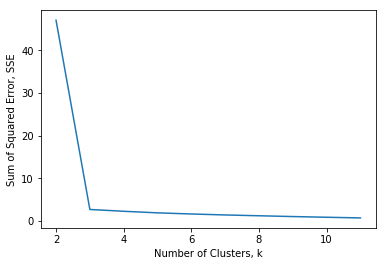

In [118]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# SSE is initialize with empty values
# n_clusters is the "k" 
sse = {}
for n_cluster1 in range(2, 12):
    kmeans1 = KMeans(n_clusters = n_cluster1, max_iter = 1000).fit(toronto_grouped_clustering)
    toronto_grouped_clustering["clusters"] = kmeans1.labels_
    
    # The inertia is the sum of distances of samples to their closest cluster centre
    sse[n_cluster1] = kmeans1.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters, k")
plt.ylabel("Sum of Squared Error, SSE")
plt.show()

Depending on the number of iteration (in this case, 200 iterations were used), the number of cluster, `k` is 3.

#### 3.11.2 Silhouette Coefficient

To find the optimal value of the number of clusters, `k`, the number of clusters is iterated corresponding `Silhouette Coefficient`is calculated for each of the k-values used. The highest Silhouette Coefficient gives the best match to its own cluster. Please see below:

In [119]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster2 in range(2, 12):
    kmeans2 = KMeans(n_clusters = n_cluster2, random_state = 0).fit(toronto_grouped_clustering)
    label2 = kmeans2.labels_
    sil_coeff = silhouette_score(toronto_grouped_clustering, label2, metric = 'euclidean')
    print("Where n_clusters = {}, the Silhouette Coefficient is {}".format(n_cluster2, sil_coeff))

Where n_clusters = 2, the Silhouette Coefficient is 0.8253581322228396
Where n_clusters = 3, the Silhouette Coefficient is 0.7927638835630393
Where n_clusters = 4, the Silhouette Coefficient is 0.7640152357662
Where n_clusters = 5, the Silhouette Coefficient is 0.7344298150750631
Where n_clusters = 6, the Silhouette Coefficient is 0.6541374902804702
Where n_clusters = 7, the Silhouette Coefficient is 0.6504442077766374
Where n_clusters = 8, the Silhouette Coefficient is 0.6194299947380675
Where n_clusters = 9, the Silhouette Coefficient is 0.6258849923751906
Where n_clusters = 10, the Silhouette Coefficient is 0.6230220054734036
Where n_clusters = 11, the Silhouette Coefficient is 0.6163750484204196


From the result, `Where n_clusters = 3` will be used.

Also, there is the use of **`GAP STAT`** (please see reference for more info: [GAP STAT](https://datasciencelab.wordpress.com/2013/12/27/finding-the-k-in-k-means-clustering/)). This project will stick to just 2 evaluations methods as demonstrated above.

#### Visualizing the Resulting Clusters

In [121]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_clusters['Latitude'], toronto_clusters['Longitude'], toronto_clusters['Neighbourhood'], toronto_clusters['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
display(map_clusters)

### 3.10 Clusters Examination

The clusters are examined as follows to see the categories that differentiate them.

#### Cluster 1

In [122]:
toronto_clusters.loc[toronto_clusters['Cluster Labels'] == 0, toronto_clusters.columns[[1] + list(range(5, toronto_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East Toronto,0,Pub,Neighborhood,Coffee Shop,Yoga Studio,Ethiopian Restaurant,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
1,East Toronto,0,Bus Line,Park,Discount Store,Fast Food Restaurant,Grocery Store,Yoga Studio,Event Space,Food & Drink Shop,Flower Shop,Fish Market
2,East Toronto,0,Pizza Place,Sandwich Place,Pet Store,Sushi Restaurant,Pub,Coffee Shop,Movie Theater,Fast Food Restaurant,Fish & Chips Shop,Burrito Place
3,East Toronto,0,Diner,Café,Italian Restaurant,Bakery,Park,Coffee Shop,Sushi Restaurant,Bar,Gym,American Restaurant
5,Central Toronto,0,Hotel,Gym,Breakfast Spot,Bus Line,Food & Drink Shop,Clothing Store,Burger Joint,Park,Donut Shop,Farmers Market
6,Central Toronto,0,Playground,Gym Pool,Park,Garden,Yoga Studio,Electronics Store,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
7,Central Toronto,0,Coffee Shop,Seafood Restaurant,Dessert Shop,Café,Italian Restaurant,Sandwich Place,Pizza Place,Farmers Market,Indian Restaurant,Sushi Restaurant
8,Central Toronto,0,Playground,Convenience Store,Park,Gym,Yoga Studio,Ethiopian Restaurant,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant
9,Central Toronto,0,Coffee Shop,Light Rail Station,Convenience Store,Supermarket,Yoga Studio,Event Space,Food & Drink Shop,Flower Shop,Fish Market,Fish & Chips Shop
10,Downtown Toronto,0,Bank,Park,Playground,Tennis Court,Building,Yoga Studio,Food & Drink Shop,Flower Shop,Fish Market,Fish & Chips Shop


By using 3 clusters, it is understandly possible to have limited results but the result from **cluster 1** above shows that this cluster falls within much more urban working area like offices, administrative, business districts or even government areas.

#### Cluster 2

In [123]:
toronto_clusters.loc[toronto_clusters['Cluster Labels'] == 1, toronto_clusters.columns[[1] + list(range(5, toronto_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Central Toronto,1,Park,Yoga Studio,Event Space,Food Court,Food & Drink Shop,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
34,West Toronto,1,Park,Convenience Store,Sandwich Place,Yoga Studio,Ethiopian Restaurant,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


Looking at the result from **cluster 2**, one can conclude that this is more of a main residential district or area.

#### Cluster 3

In [124]:
toronto_clusters.loc[toronto_clusters['Cluster Labels'] == 2, toronto_clusters.columns[[1] + list(range(5, toronto_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Central Toronto,2,Bus Line,Swim School,Yoga Studio,Exhibit,Food Court,Food & Drink Shop,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant


Although cluster 3 is almost similar to cluster 2, it falls within the edge of residential and business districts.

<a id='conclude'></a>

## Conclusion

After creating the clusters using a random number 5, the evaluation of the required number of clusters was done using the **Elbow Method** and the **Silhouette Coefficient**, these gave 3 clusters as the optimal for the `k-mean`.

Essentially, one can conclude that 3 clusters are:

1. Main Business District
2. Residential District
3. Boundary District to the cluster 1 and 2